<a href="https://colab.research.google.com/github/MRayhanAP/MRayhanAP-PCVK_Genap_2021/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


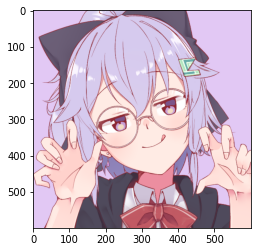

In [ ]:
import cv2 as cv 
from google.colab.patches import cv2_imshow 
from skimage import io 
import matplotlib.pyplot as plt 
import numpy as np 

img_f = cv.imread('/content/drive/MyDrive/01kitten.png')
img_rgb = cv.cvtColor(img_f,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
plt.imshow(img_rgb)

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


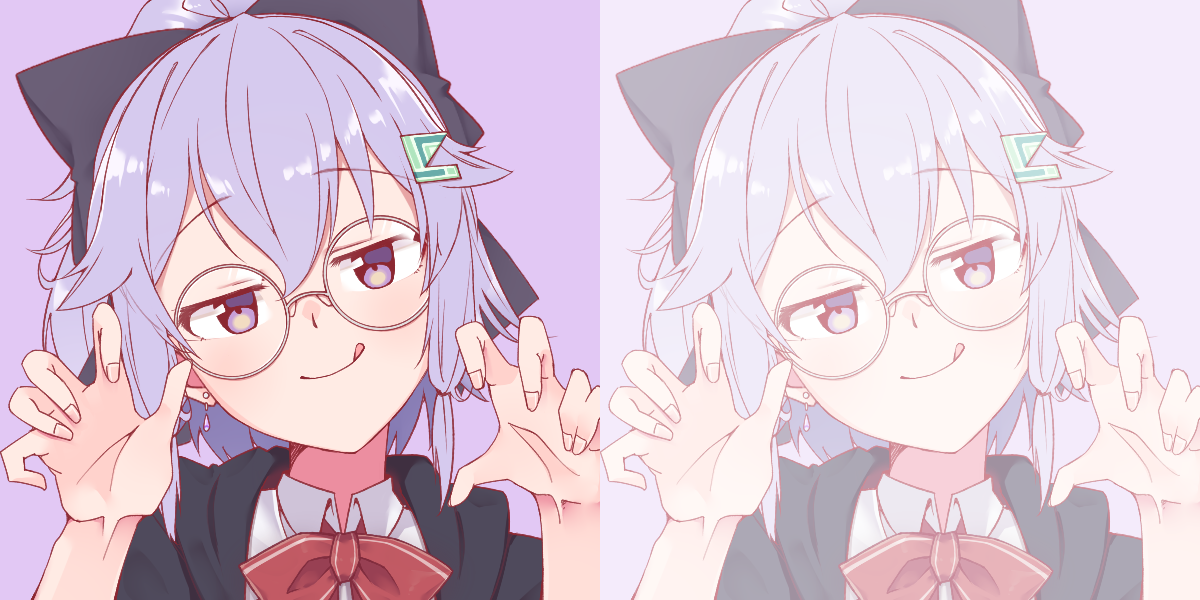

In [ ]:
# Tugas 1
print(' Gamma Correction pada citra ')
print('----------------------------------')
try: 
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.cvtColor(img_rgb,cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c]/255,(1/gamma)), 0, 255)
     
final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai bit depth: 3


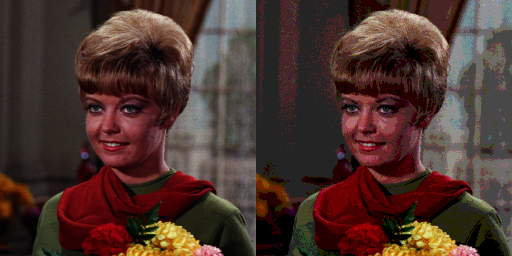

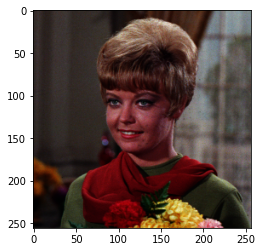

In [11]:
# Tugas 2

import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import glob
from math import log10, sqrt

img = cv.imread('/content/drive/MyDrive/female.tiff')
image = cv.cvtColor(img,cv.COLOR_BGR2RGB)

plt.imshow(image)
original = cv.cvtColor(image,cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)

print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  bd = float(input('Masukkan nilai bit depth: '))
except ValueError:
  print('Error, not a number')
bit=2**bd
level = 255/(bit-1)
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_image[y,x,c] = np.clip(round(original[y,x,c]/level)*level, 0, 255);

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai db: 5


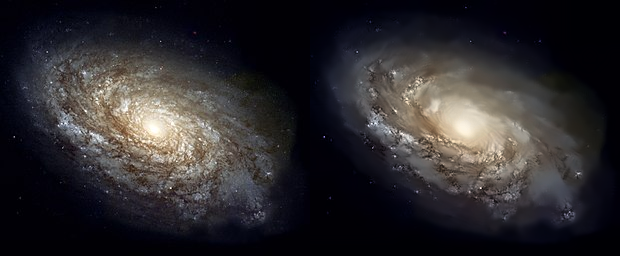

In [14]:
# Tugas 3
from matplotlib import pyplot as plt

print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  db = int(input('Masukkan nilai db: '))
except ValueError:
  print('Error, not a number')

img2 = cv.imread('/content/drive/MyDrive/galaxy.jpg')

# denoising of image saving it into dst image 
dst = cv.fastNlMeansDenoisingColored(img2, None, 10, db, 7, 15) 
  
# Plotting of source and destination image 
final_frame = cv.hconcat((img2, dst))
cv2_imshow(final_frame)

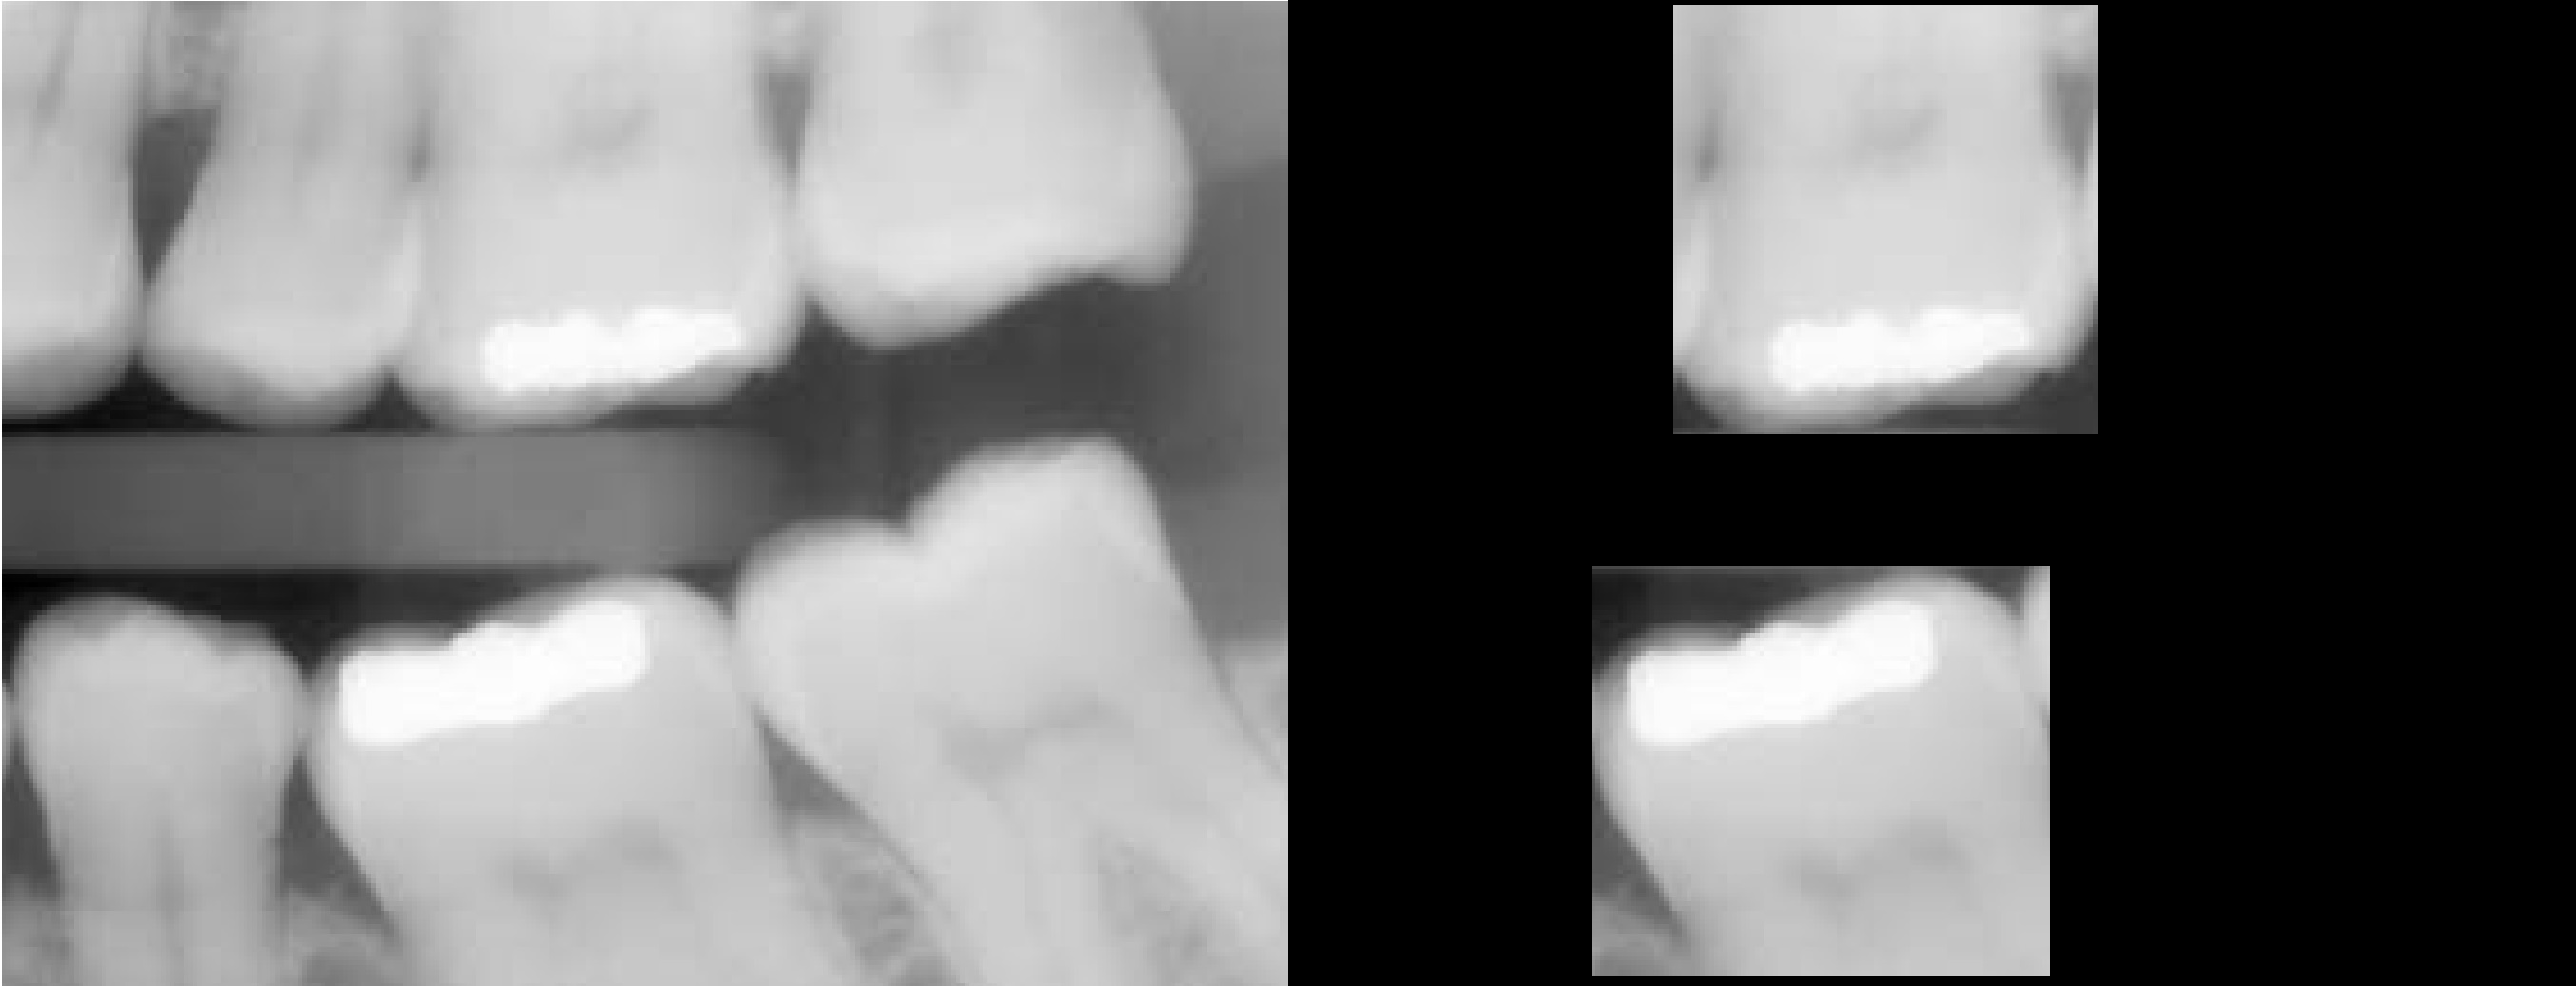

In [16]:
# Tugas 4
img = cv.imread('/content/drive/MyDrive/teeth.jpg')
#img = cv.resize(img, (0,0), fx=0.5, fy=0.5) 
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.rectangle(mask,pt1=(320,595),pt2=(800,1025),color=(255,255,255),thickness=-1)

result = img & mask

mask1 = cv.rectangle(mask,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)

result = img & mask1

final_frame = cv.hconcat((img, result))
cv2_imshow(final_frame)

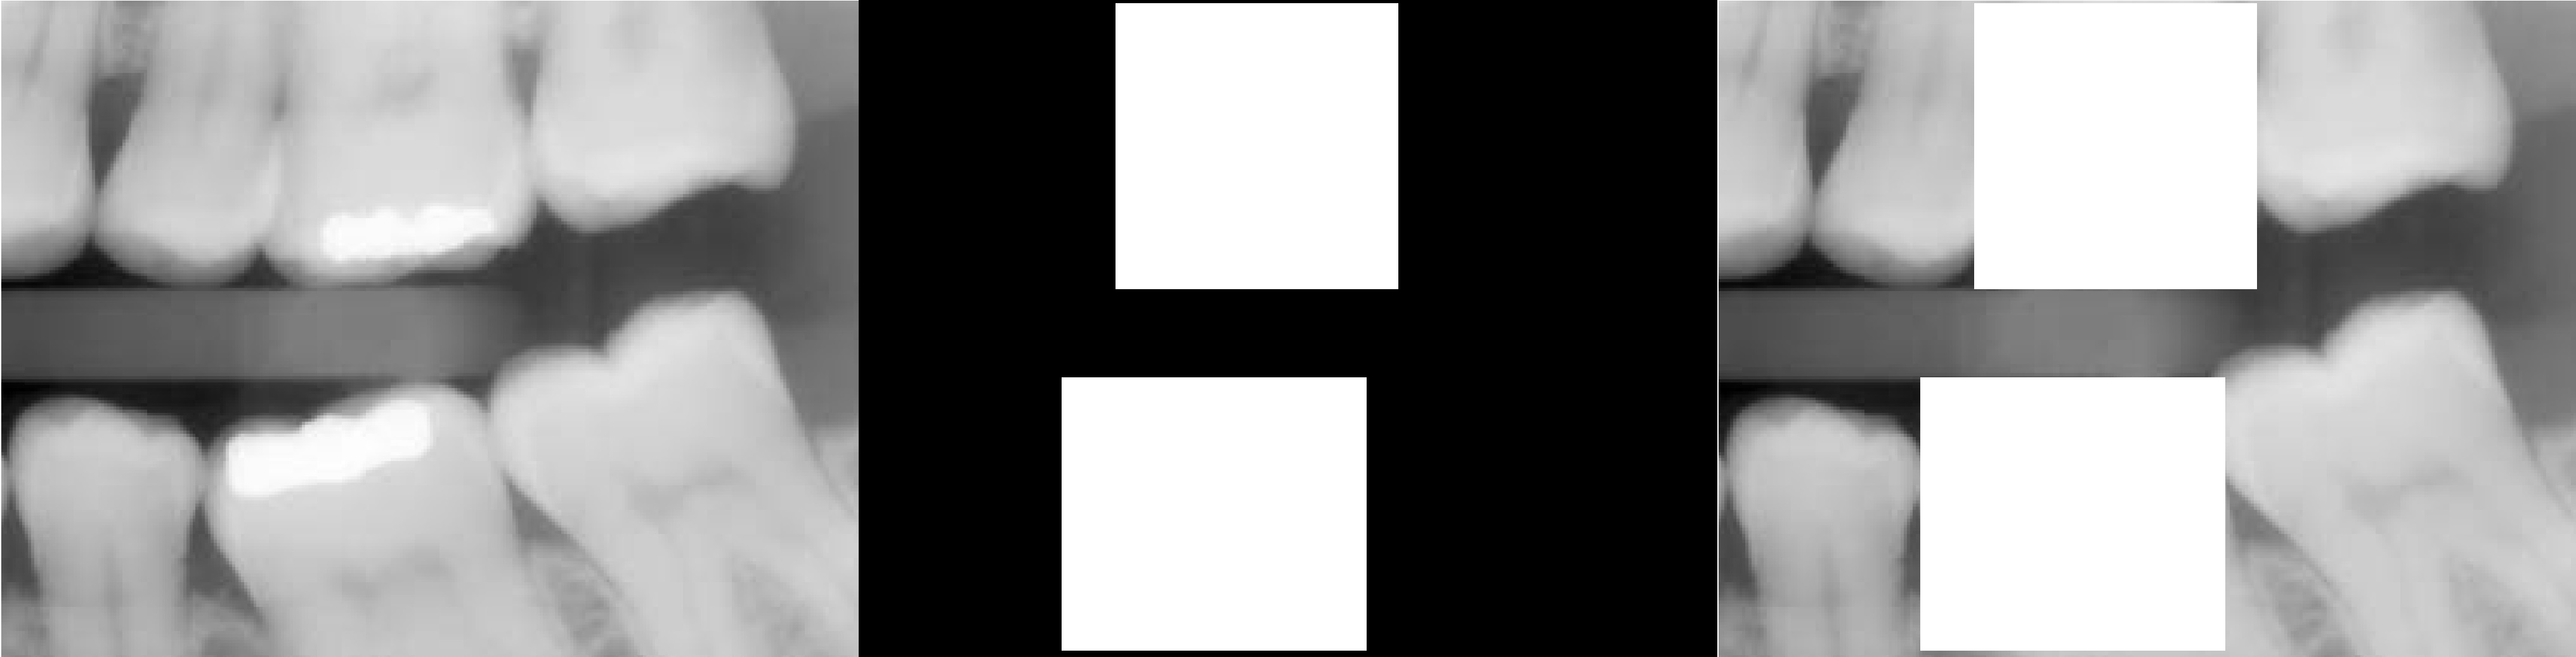

In [17]:
#OR

img = cv.imread('/content/drive/MyDrive/teeth.jpg')
mask_or = np.zeros(img.shape, dtype=np.uint8)
mask_or = cv.rectangle(mask_or,pt1=(320,595),pt2=(800,1025),color=(255,255,255),thickness=-1)

result = img | mask_or

mask_or1 = cv.rectangle(mask_or,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)

result_or1 = img | mask_or1

final_frame = cv.hconcat((img, mask_or, result_or1))
cv2_imshow(final_frame)

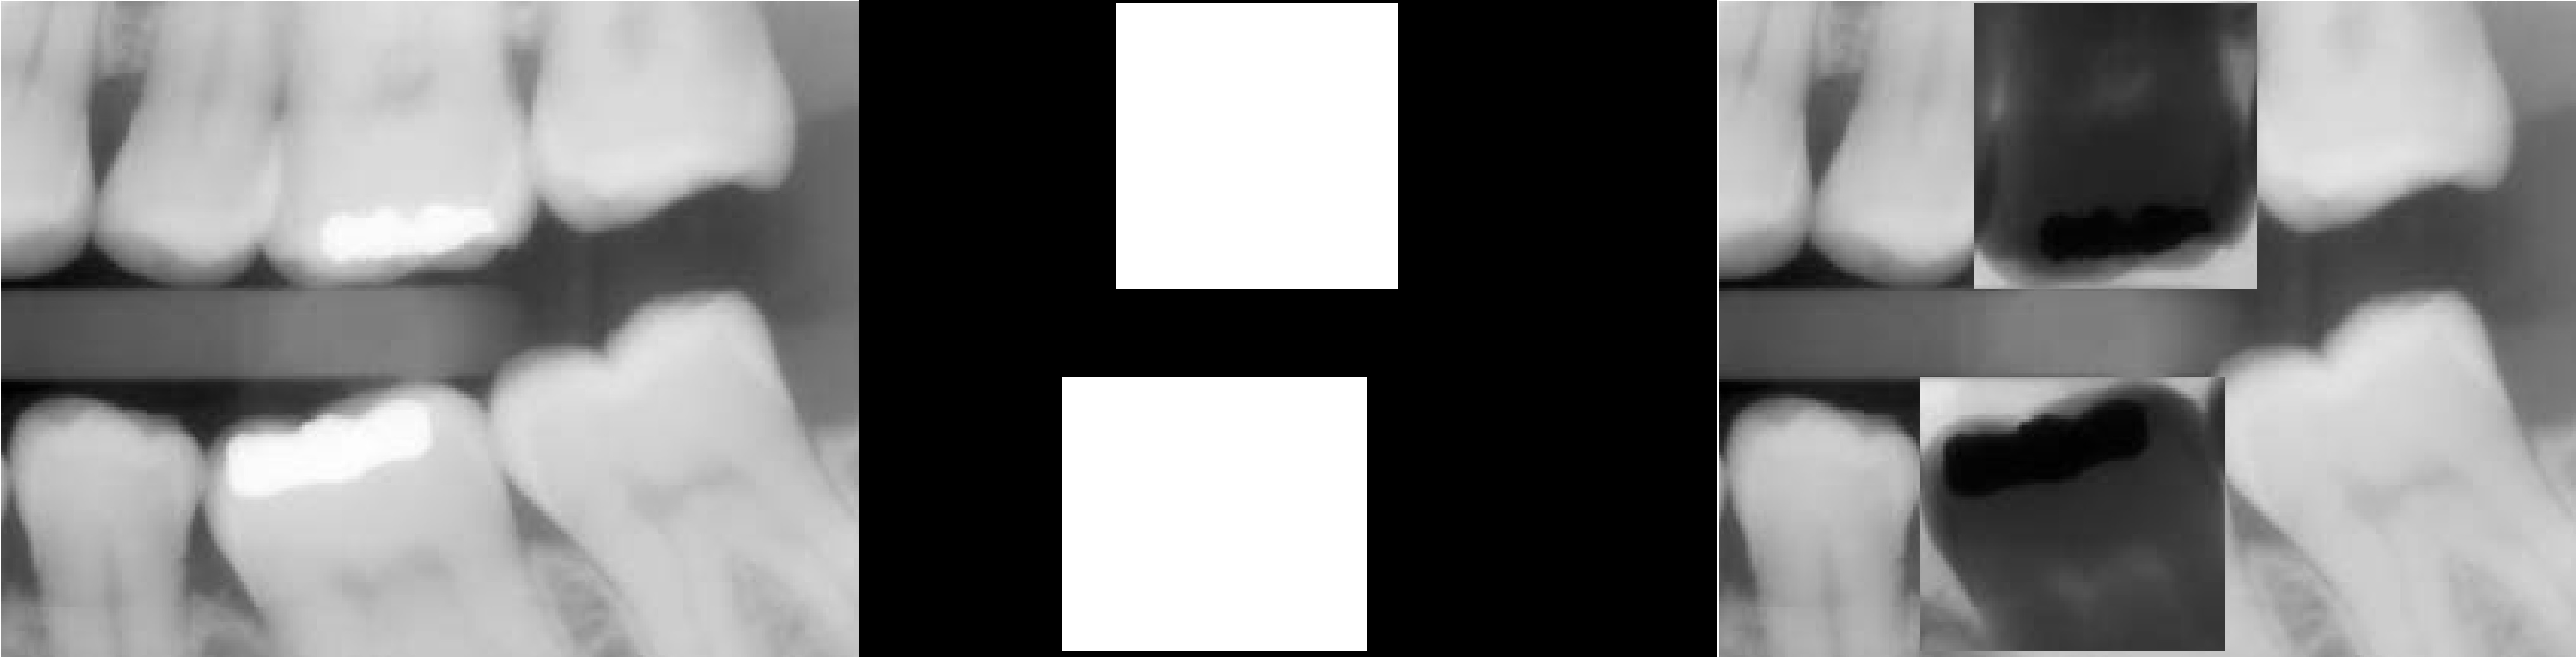

In [18]:
#NOT
img = cv.imread('/content/drive/MyDrive/teeth.jpg')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.rectangle(mask_or,pt1=(320,595),pt2=(800,1025),color=(255,255,255),thickness=-1)

result = img ^ mask

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

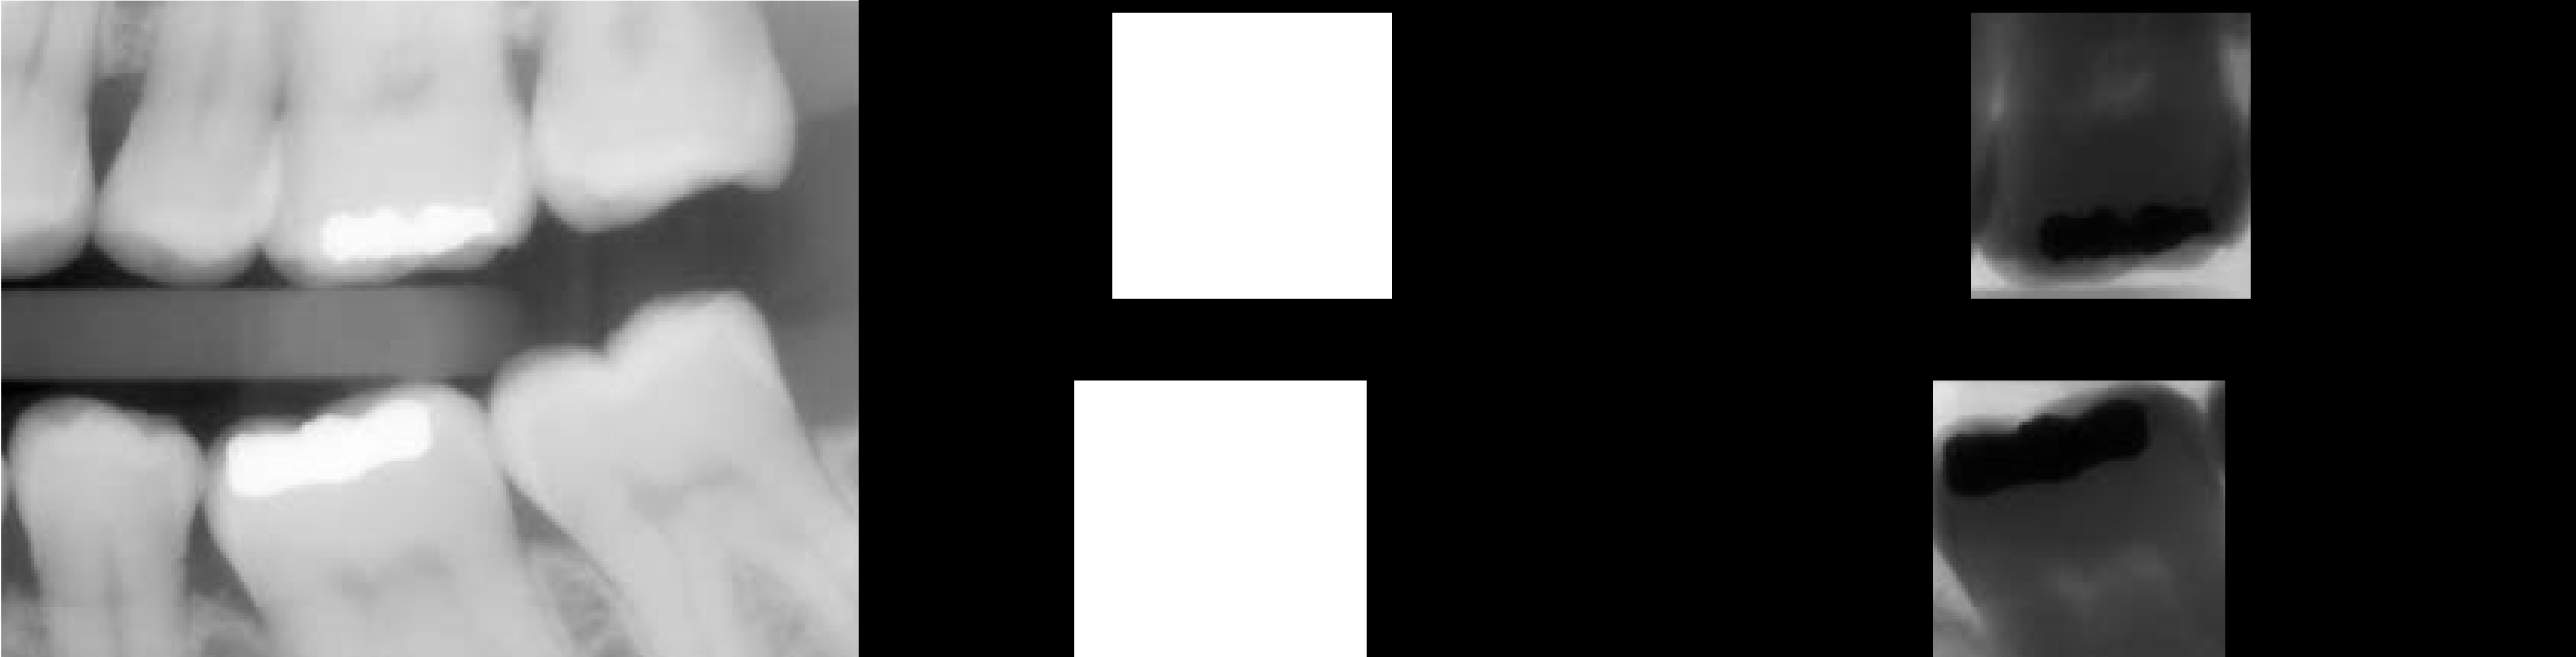

In [21]:
#NAND
img = cv.imread('/content/drive/MyDrive/teeth.jpg')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.rectangle(mask,pt1=(400,20),pt2=(840,470),color=(255,255,255), thickness=-1)
mask = cv.rectangle(mask,pt1=(340,600),pt2=(800,1200),color=(255,255,255), thickness=-1)


result = ~img & mask

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

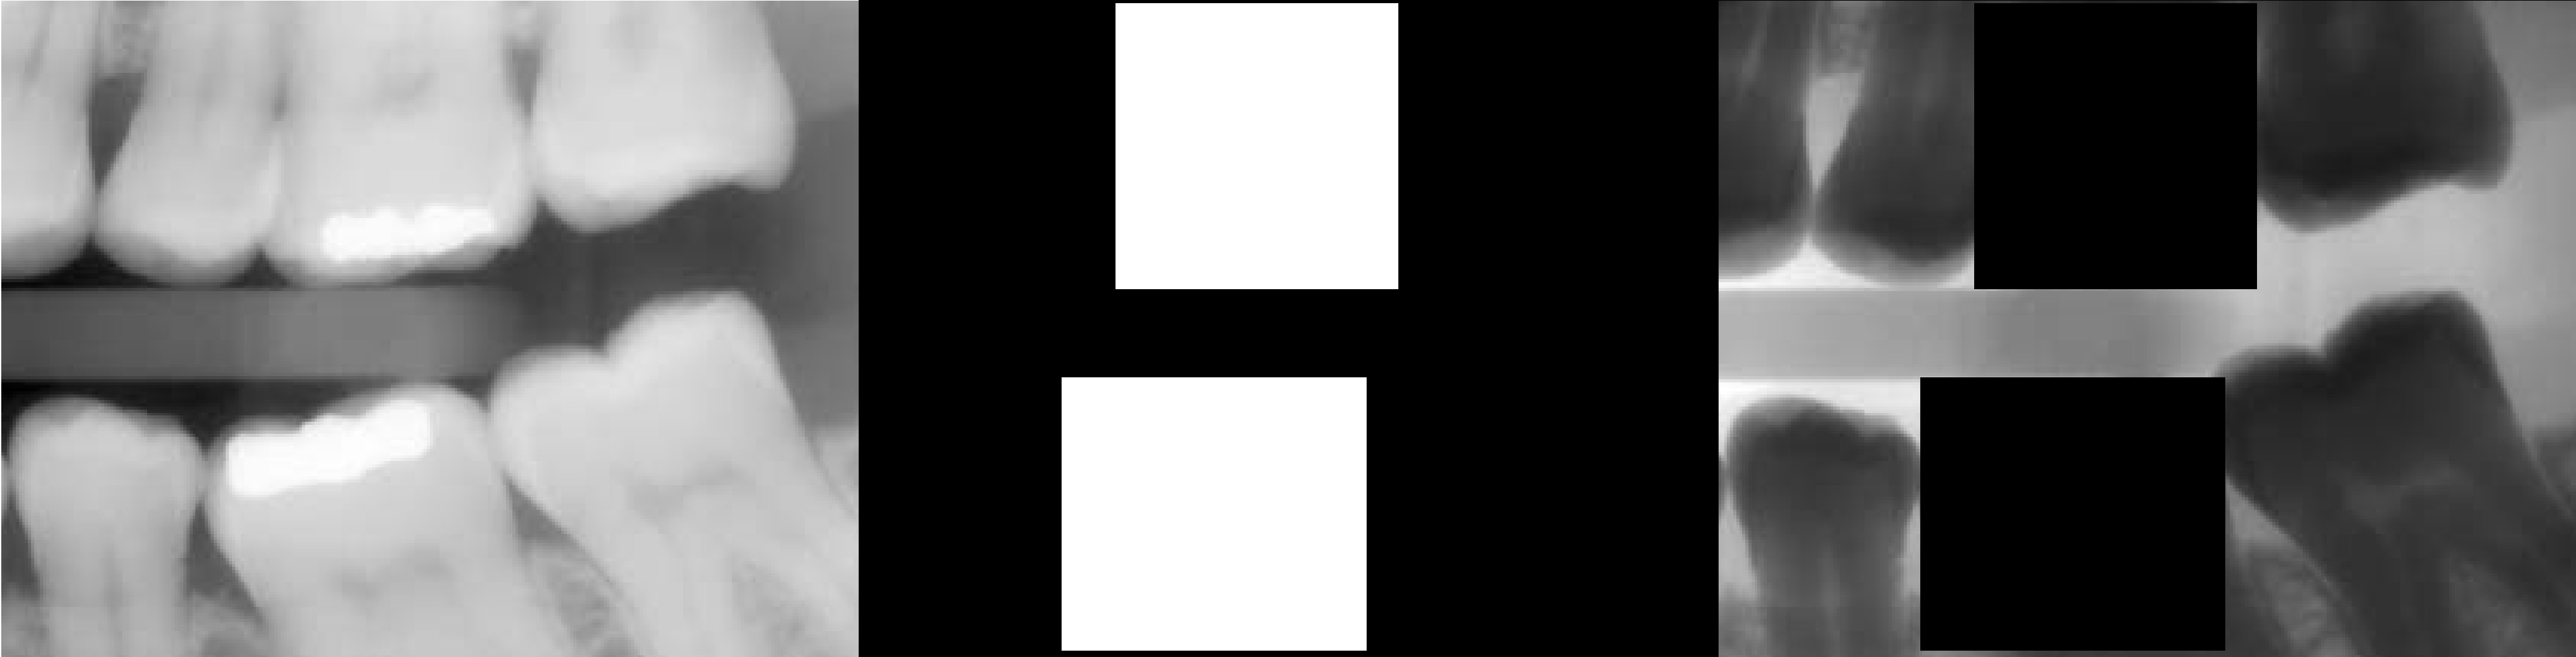

In [19]:
#XOR
img = cv.imread('/content/drive/MyDrive/teeth.jpg')
mask_not = np.zeros(img.shape, dtype=np.uint8)
mask_not = cv.rectangle(mask_not,pt1=(320,595),pt2=(800,1025),color=(255,255,255),thickness=-1)

result = ~img & ~mask_not

mask_not1 = cv.rectangle(mask_not,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)

result_not1 = ~img & ~mask_not1

final_frame = cv.hconcat((img, mask_not, result_not1))
cv2_imshow(final_frame)